In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
titanic_data = pd.read_csv("C:/Users/HOU_User/OneDrive - Artra Technologies Pvt Ltd/Python_CSV/train.csv", usecols=['Age','Fare','Survived'])

In [15]:
titanic_data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
titanic_data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
trf1 = ColumnTransformer([
    ('Impute_Age', SimpleImputer(),[1])
], remainder='passthrough')

In [45]:
pipe3 = Pipeline([
    ('trf1',trf1)
])

In [47]:
data = pipe3.fit_transform(titanic_data)

In [26]:
titanic_data_copy = pd.DataFrame(data, columns=['Age', 'Survived', 'Fare'])

In [27]:
titanic_data_copy.head()

,Age,Survived,Fare
0,22.0,0.0,7.2500
1,38.0,1.0,71.2833
2,26.0,1.0,7.9250
3,35.0,1.0,53.1000
4,35.0,0.0,8.0500


In [28]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data_copy.drop(columns=['Survived']), titanic_data_copy.Survived, test_size=0.25, random_state=42)

C:\Users\HOU_User\AppData\Local\Temp\ipykernel_24140\136359568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


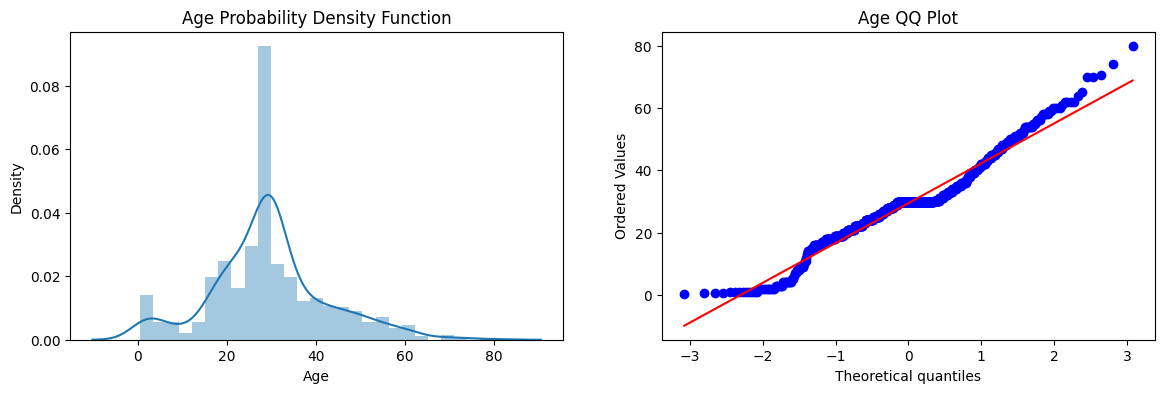

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Probability Density Function')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\HOU_User\AppData\Local\Temp\ipykernel_24140\986492493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


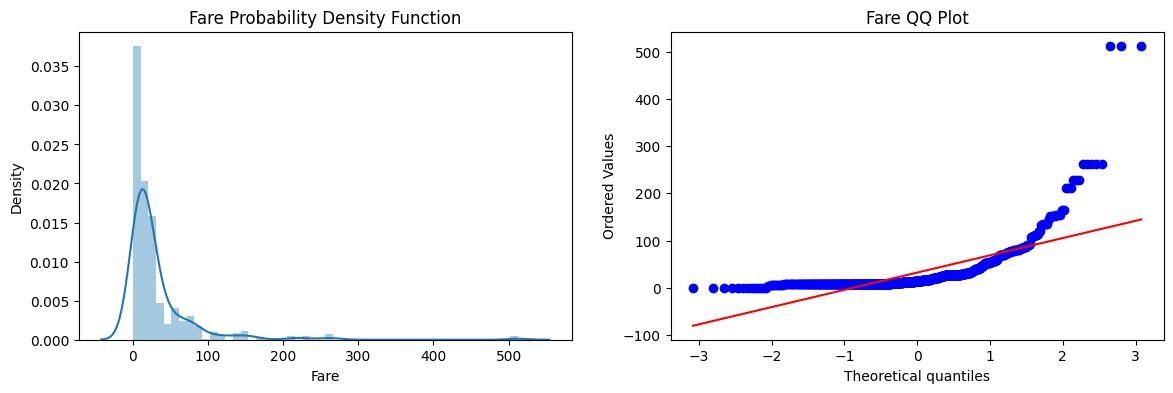

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Probability Density Function')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [32]:
trf2 = LogisticRegression()
trf3 = DecisionTreeClassifier()

In [37]:
pipe1 = Pipeline([
('trf1', trf1),
('trf2', trf2)
])

In [38]:
pipe2 = Pipeline([
    ('trf1',trf1),
    ('trf3', trf3)
])

In [39]:

pipe1.fit(X_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Impute_Age', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
pipe2.fit(X_train,y_train)

,steps,"[('trf1', ...), ('trf3', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Impute_Age', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
trf2.fit(X_train,y_train)
trf3.fit(X_train,y_train)
    
y_pred = trf2.predict(X_test)
y_pred1 = trf3.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6636771300448431
Accuracy DT 0.6905829596412556


In [53]:
trf = FunctionTransformer(func=np.log1p)

In [54]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [55]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6816143497757847
Accuracy DT 0.6905829596412556


In [60]:

X = titanic_data_copy.iloc[:,[0,2]]
y = titanic_data_copy.iloc[:,1]

In [62]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [59]:
titanic_data_copy

,Age,Survived,Fare
0,22.000000,0.0,7.2500
1,38.000000,1.0,71.2833
2,26.000000,1.0,7.9250
3,35.000000,1.0,53.1000
4,35.000000,0.0,8.0500
...,...,...,...
886,27.000000,0.0,13.0000
887,19.000000,1.0,30.0000
888,29.699118,0.0,23.4500
889,26.000000,1.0,30.0000


In [63]:

X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6621847690387016


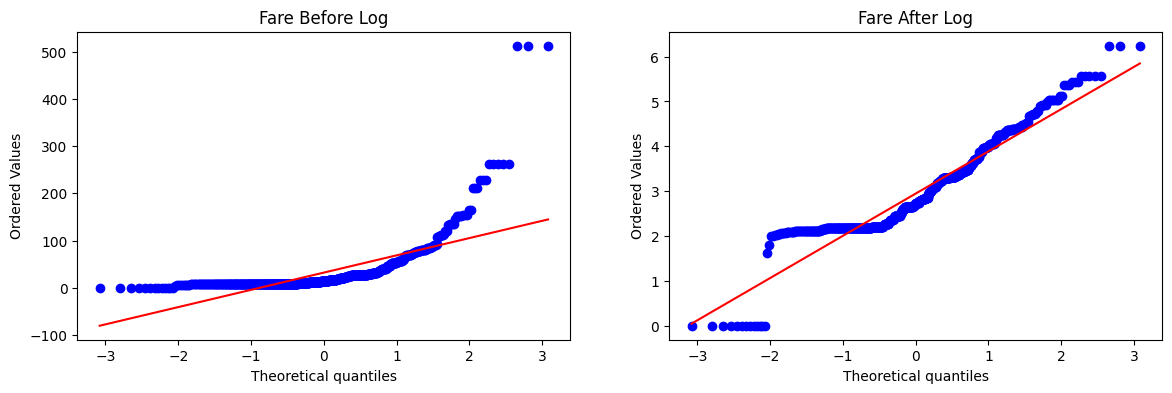

In [64]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

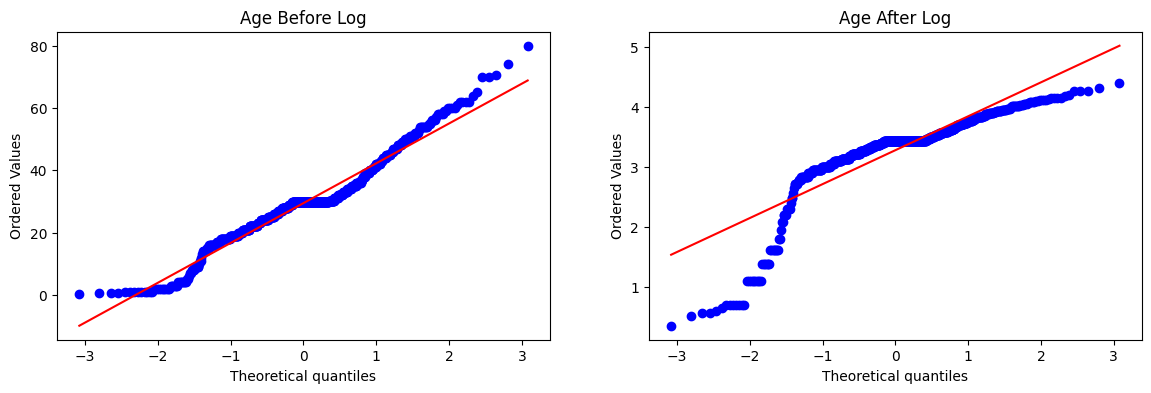

In [65]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [69]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p),[1])
])

In [70]:
X_train

,Age,Fare
298,29.699118,30.5000
884,25.000000,7.0500
247,24.000000,14.5000
478,22.000000,7.5208
305,0.920000,151.5500
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [71]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [72]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6816143497757847
Accuracy DT 0.7085201793721974


In [111]:
def apply_transformation(transform):
    X = titanic_data_copy.iloc[:,[0,2]]
    y = titanic_data_copy.iloc[:,1]
    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), [1])
    ])
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print(f"Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X.iloc[:,1], dist="norm", plot=plt)
    plt.figure(figsize=(10,6))

    plt.subplot(122)
    stats.probplot(X_trans.ravel(), dist="norm", plot=plt)
    plt.title('Fare After Transform')
    plt.show()

Accuracy 0.6083021223470662


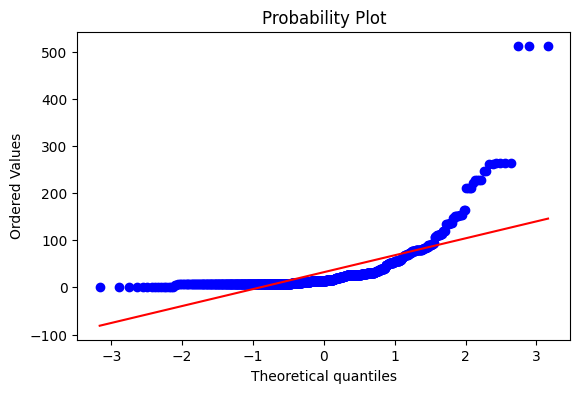

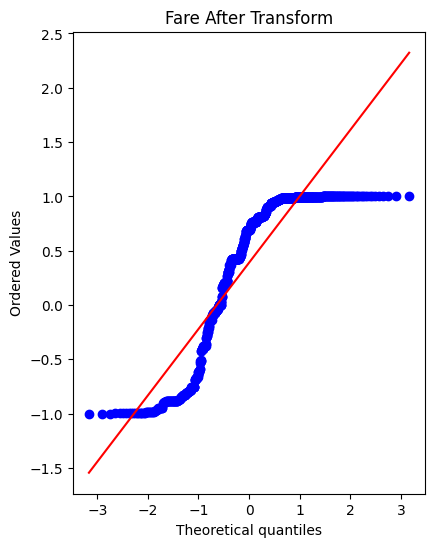

In [112]:

apply_transformation(np.sin)

In [80]:
X = titanic_data_copy.iloc[:,[0,2]]
y = titanic_data_copy.iloc[:,1]
trf = ColumnTransformer([
    ('log', FunctionTransformer(np.sin), [1])
])

In [81]:
X_trans = trf.fit_transform(X)

In [84]:
X_trans

array([[ 0.82308088],
       [ 0.82676416],
       [ 0.99747926],
       [ 0.30227187],
       [ 0.98084984],
       [ 0.82288959],
       [ 0.99965624],
       [ 0.79326245],
       [-0.9905308 ],
       [-0.97464445],
       [-0.83714178],
       [ 0.98823625],
       [ 0.98084984],
       [-0.14046053],
       [ 0.99999998],
       [-0.28790332],
       [-0.75171986],
       [ 0.42016704],
       [-0.75098725],
       [ 0.80862705],
       [ 0.76255845],
       [ 0.42016704],
       [ 0.9846885 ],
       [-0.80901877],
       [ 0.79326245],
       [-0.02842271],
       [ 0.80862705],
       [-0.77944719],
       [ 0.99968203],
       [ 0.99912574],
       [ 0.52569668],
       [ 0.90613474],
       [ 0.99459878],
       [-0.87969576],
       [ 0.47008847],
       [ 0.98662759],
       [ 0.81109087],
       [ 0.98084984],
       [-0.75098725],
       [-0.96986366],
       [-0.05020093],
       [ 0.83665564],
       [ 0.99912574],
       [-0.67317613],
       [ 0.99968203],
       [ 0

In [85]:
clf = LogisticRegression()
print(f"Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))


Accuracy 0.6083021223470662


In [97]:
X.iloc[:,1]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [109]:
X_trans.ravel()

array([ 0.82308088,  0.82676416,  0.99747926,  0.30227187,  0.98084984,
        0.82288959,  0.99965624,  0.79326245, -0.9905308 , -0.97464445,
       -0.83714178,  0.98823625,  0.98084984, -0.14046053,  0.99999998,
       -0.28790332, -0.75171986,  0.42016704, -0.75098725,  0.80862705,
        0.76255845,  0.42016704,  0.9846885 , -0.80901877,  0.79326245,
       -0.02842271,  0.80862705, -0.77944719,  0.99968203,  0.99912574,
        0.52569668,  0.90613474,  0.99459878, -0.87969576,  0.47008847,
        0.98662759,  0.81109087,  0.98084984, -0.75098725, -0.96986366,
       -0.05020093,  0.83665564,  0.99912574, -0.67317613,  0.99968203,
        0.98084984,  0.20646748,  0.99459878,  0.30691375, -0.86720218,
        0.91406825,  0.99854335,  0.97138074,  0.76255845, -0.75302874,
       -0.80901877, -0.87969576,  0.81109087,  0.50063649,  0.22202401,
        0.81109087, -0.99388865,  0.97528376,  0.36565262,  0.52569668,
        0.44588547, -0.87969576,  0.95405142,  0.99747926,  0.69

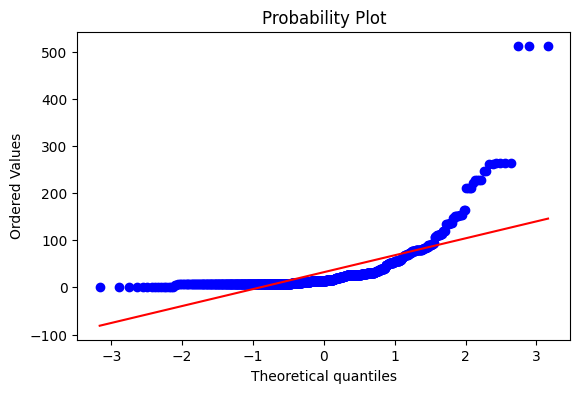

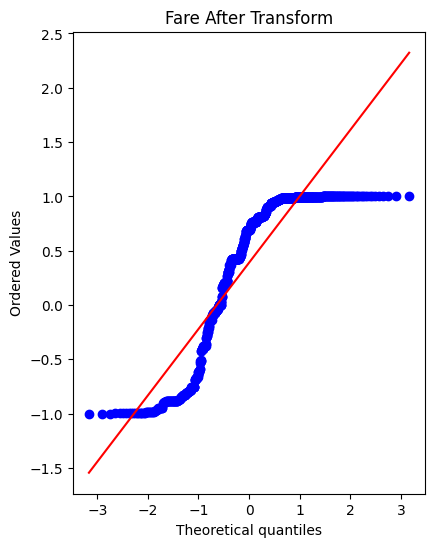

In [110]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X.iloc[:,1], dist="norm", plot=plt)
plt.figure(figsize=(10,6))


plt.subplot(122)
stats.probplot(X_trans.ravel(), dist="norm", plot=plt)
plt.title('Fare After Transform')
plt.show()